In [80]:
import pandas as pd
import numpy as np

In [81]:
df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

In [99]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_NFL = pd.read_csv("data/NFL_team_data.csv")
df_TS = pd.read_csv("data/AmericanFootball98.csv")

# Prepare features
features = ['wins', 'losses', 'PF', '1st downs', 'completions', 'pass attempts']
X = df_TS[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to DataFrame
df_TS['Cluster'] = clusters

# Prepare target variable for SVM
y = df_TS['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict cluster labels for test set
y_pred = svm_model.predict(X_test)

# Evaluate SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the cluster for a new data point (e.g., next Super Bowl)
#new_data_point = scaler.transform([[5]])  # Adjust based on the number of Super Bowl wins
#predicted_cluster = svm_model.predict(new_data_point)
#print("Predicted Cluster for New Data Point:", predicted_cluster)

# Get teams in the predicted cluster
teams_in_cluster = df_TS[df_TS['Cluster'] == predicted_cluster[0]]['team_code'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Accuracy: 0.9701492537313433
Teams in Predicted Cluster: ['buf2019', 'rav2019', 'oti2019', 'clt2019', 'min2019', 'sfo2019', 'sea2019', 'htx2018', 'oti2018', 'sdg2018', 'dal2018', 'chi2018', 'sea2018', 'buf2017', 'jax2017', 'oti2017', 'dal2017', 'min2017', 'car2017', 'atl2017', 'ram2017', 'sea2017', 'mia2016', 'buf2016', 'oti2016', 'den2016', 'dal2016', 'buf2015', 'cin2015', 'kan2015', 'min2015', 'car2015', 'sea2015', 'cin2014', 'htx2014', 'kan2014', 'dal2014', 'sea2014', 'crd2014', 'sfo2014', 'nyj2013', 'kan2013', 'phi2013', 'car2013', 'sea2013', 'sfo2013', 'cin2012', 'was2012', 'nyg2012', 'min2012', 'chi2012', 'car2012', 'sfo2012', 'sea2012', 'nyj2011', 'rav2011', 'pit2011', 'cin2011', 'htx2011', 'den2011', 'rai2011', 'chi2011', 'car2011', 'sfo2011', 'nwe2010', 'nyj2010', 'pit2010', 'rav2010', 'jax2010', 'kan2010', 'rai2010', 'chi2010', 'tam2010', 'nyj2009', 'cin2009', 'rav2009', 'oti2009', 'sdg2009', 'phi2009', 'car2009', 'mia2008', 'nyj2008', 'pit2008', 'rav2008', 'oti2008', 'sdg200

In [82]:
df_teamstats.drop(df_teamstats.columns[33:], axis=1, inplace=True)
df_sb.drop(df_sb.columns[6:], axis=1, inplace=True)
df_sb.drop(0, inplace=True)

#changes date to year
df_sb['Year'] = pd.to_datetime(df_sb['Date']).dt.year
df_sb.drop(labels = 'Date', axis=1, inplace=True)

#changes sb roman number to just int
df_sb['SB'] = df_sb['SB'].str.replace(r'[a-zA-Z]', '', regex=True)
df_sb['SB'] = df_sb['SB'].str.replace(r'\(|\)', '', regex=True)

#moves year
column_to_move = df_sb.pop("Year")
df_sb.insert(0, "Year", column_to_move)

In [83]:
#Extracting the team names and years from df_teamstats
df_teamstats['Team'] = df_teamstats['team_code'].str.extract(r'([A-Za-z]{3})')
df_teamstats['Year'] = df_teamstats['team_code'].str.extract(r'(\d{4})')

#reorder columns
column_to_move = df_teamstats.pop("Year")
df_teamstats.insert(0, "Year", column_to_move)
column_to_move = df_teamstats.pop("Team")
df_teamstats.insert(1, "Team", column_to_move)

#delete team_code
df_teamstats = df_teamstats.drop('team_code', axis=1)
df_teamstats

,Year,Team,wins,losses,PF,yards,plays,yards/play,TO,Fumbles Lost,...,pen yards,pen 1st downs,number drives,score percentage,turnover percentage,avg start,avg time per drive,avg plays per drive,avg yards per drive,avg points per drive
0,2019,nwe,12,4,420,5664,1095,5.2,15,6,...,828,31,185,36.8,7.6,Own 32.5,2:40,5.97,29.9,1.99
1,2019,buf,10,6,314,5283,1018,5.2,19,7,...,927,32,183,30.6,10.4,Own 28.9,2:34,5.62,28.6,1.66
2,2019,nyj,7,9,276,4368,956,4.6,25,9,...,1105,30,183,23.0,11.5,Own 26.4,2:28,5.23,23.1,1.21
3,2019,mia,5,11,306,4960,1022,4.9,26,8,...,769,41,180,30.6,13.3,Own 27.6,2:33,5.78,27.1,1.63
4,2019,rav,14,2,531,6521,1064,6.1,15,7,...,867,27,163,52.1,8.6,Own 28.9,3:22,6.61,39.3,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1999,ram,13,3,526,6412,994,6.5,31,16,...,889,26,188,39.9,15.4,Own 31.5,2:42,5.44,34.1,2.37
665,1999,car,8,8,421,5686,982,5.8,34,19,...,857,21,192,38.0,15.1,Own 32.7,2:27,5.26,29.6,2.14
666,1999,atl,5,11,285,4542,931,4.9,35,16,...,968,26,184,25.0,17.4,Own 30.2,2:30,5.17,24.6,1.42
667,1999,sfo,4,12,295,5380,1012,5.3,32,13,...,1045,26,182,26.9,15.9,Own 28.5,2:40,5.69,29.5,1.42


In [84]:
1.22
669 rows × 34 columns

#Dictionaries
sb_dict = {
    "New England Patriots":1,
    "Miami Dolphins":2,
    "Buffalo Bills":3,
    "New York Jets":4,
    "Cincinnati Bengals":5,
    "Pittsburgh Steelers":6,
    "Baltimore Ravens":7,
    "Cleveland Browns": 8, #team has not been to the SB yet
    "Baltimore Colts":9,
    "Indianapolis Colts":10, #2nd Colts Team
    "Jacksonville Jaguars":11, #team has not been to the SB yet
    "Tennessee Titans":12, 
    "Houston Texans":13, #team has not been to the SB yet
    "Denver Broncos":14,
    "Kansas City Chiefs":15,
    "San Diego Chargers":16, #omitted LA Chargers, no SB appearance
    "Oakland Raiders":17, #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":18, #2nd Raiders Team
    "New York Giants":19,
    "Washington Redskins":20, #omitted Commanders, no SB appearance
    "Dallas Cowboys":21,
    "Philadelphia Eagles":22,
    "Chicago Bears":23,
    "Minnesota Vikings":24,
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":25,
    "Tampa Bay Buccaneers":26,
    "Carolina Panthers":27,
    "Atlanta Falcons":28,
    "New Orleans Saints":29,
    "Seattle Seahawks":30,
    "St. Louis Rams":31,
    "Los Angeles Rams":32, #2nd Rams Team
    "Arizona Cardinals":33,
    "San Francisco 49ers":34
}

team_dict = {
    "Patriots": 1,
    "mia":2,
    "buf":3,
    "nyj":4,
    "cin":"Bengals",
    "pit":"Steelers",
    "rav":"Ravens",
    "cle":"Browns",
    "clt":"Colts",
    "jax":"Jaguars",
    "oti":"Titans",
    "htx":"Texans",
    "den":"Broncos",
    "kan":"Chiefs",
    "sdg":"Chargers",
    "rai":"Raiders",
    "nyg":"Giants",
    "was":"Redskins",
    "dal":"Cowboys",
    "phi":"Eagles",
    "chi":"Bears",
    "min":"Vikings",
    "det":"Lions",
    "gnb":"Packers",
    "tam":"Buccaneers",
    "car":"Panthers",
    "atl":"Falcons",
    "nor":"Saints",
    "sea":"Seahawks",
    "ram":"Rams",
    "crd":"Cardinals",
    "sfo":"49ers"
}

SyntaxError: invalid syntax (289445858.py, line 2)

In [85]:
import pandas as pd

df_teamstats = pd.read_csv("data/AmericanFootball98.csv")
df_sb = pd.read_csv("data/superbowl.csv")

df_teamstats = df_teamstats[['team_code', 'wins', 'losses', 'PF', 'yards', 'plays', 
                            '1st downs', 'completions', 'pass attempts', 'pass yards', 
                            'rush yards', 'score percentage', 'opp PF', 'opp yards', 'opp plays']]


df_teamstats['team_name'] = df_teamstats['team_code'].str[:3]
df_teamstats['year'] = df_teamstats['team_code'].str[-4:]
df_teamstats = df_teamstats.drop(columns=['team_code'])

df_teamstats['year'] = pd.to_numeric(df_teamstats['year'])

# drop all rows from 2004 and older
df_teamstats = df_teamstats[df_teamstats['year'] > 2004]

cols = ['team_name', 'year'] + [col for col in df_teamstats.columns if col not in ['team_name', 'year']]
df_teamstats = df_teamstats[cols]


# mapping of team abbreviations to full names
team_mapping = {
    'nwe': 1,
    'buf': 2,
    'nyj': 3,
    'mia': 4,
    'rav': 5,
    'pit': 6,
    'cle': 7,
    'cin': 8,
    'htx': 9,
    'oti': 10,
    'clt': 11,
    'jax': 12,
    'kan': 13,
    'den': 14,
    'rai': 15,
    'sdg': 16,
    'phi': 17,
    'dal': 18,
    'nyg': 19,
    'was': 20,
    'gnb': 21,
    'min': 22,
    'chi': 23,
    'det': 24,
    'nor': 25,
    'atl': 26,
    'tam': 27,
    'car': 28,
    'sfo': 29,
    'sea': 30,
    'ram': 31,
    'crd': 32
}

sb_dict = {
    "New England Patriots":1,
    "Miami Dolphins":2,
    "Buffalo Bills":3,
    "New York Jets":4,
    "Cincinnati Bengals":5,
    "Pittsburgh Steelers":6,
    "Baltimore Ravens":7,
    "Cleveland Browns": 8, #team has not been to the SB yet
    "Baltimore Colts":9,
    "Indianapolis Colts":10, #2nd Colts Team
    "Jacksonville Jaguars":11, #team has not been to the SB yet
    "Tennessee Titans":12, 
    "Houston Texans":13, #team has not been to the SB yet
    "Denver Broncos":14,
    "Kansas City Chiefs":15,
    "San Diego Chargers":16, #omitted LA Chargers, no SB appearance
    "Oakland Raiders":17, #omitted LV Raiders, no SB appearance
    "Los Angeles Raiders":18, #2nd Raiders Team
    "New York Giants":19,
    "Washington Redskins":20, #omitted Commanders, no SB appearance
    "Dallas Cowboys":21,
    "Philadelphia Eagles":22,
    "Chicago Bears":23,
    "Minnesota Vikings":24,
    "Detroit Lions":"Lions", #team has not been to SB yet
    "Green Bay Packers":25,
    "Tampa Bay Buccaneers":26,
    "Carolina Panthers":27,
    "Atlanta Falcons":28,
    "New Orleans Saints":29,
    "Seattle Seahawks":30,
    "St. Louis Rams":31,
    "Los Angeles Rams":32, #2nd Rams Team
    "Arizona Cardinals":33,
    "San Francisco 49ers":34
}


df_teamstats['team_name'] = df_teamstats['team_name'].map(team_mapping)

df_sb = df_sb[['Date', 'Winner']]
df_sb['Date'] = df_sb['Date'].str[-4:]

df_sb['Date'] = pd.to_numeric(df_sb['Date'])

# drop all rows from 2004 and older
df_sb = df_sb[df_sb['Date'] > 2004]


df_sb.rename(columns={'Date': 'year'}, inplace=True)

df_merged = pd.merge(df_teamstats, df_sb, on='year', how='left')
df_merged.rename(columns={'Winner': 'winner'}, inplace=True)

df_merged['winner'] = df_merged['winner'].map(sb_dict)

df_merged

,team_name,year,wins,losses,PF,yards,plays,1st downs,completions,pass attempts,pass yards,rush yards,score percentage,opp PF,opp yards,opp plays,winner
0,1,2019,12,4,420,5664,1095,338,378,620,3961,1703,36.8,225,4414,948,1
1,2,2019,10,6,314,5283,1018,314,299,513,3229,2054,30.6,259,4772,985,1
2,3,2019,7,9,276,4368,956,253,323,521,3111,1257,23.0,359,5170,1037,1
3,4,2019,5,11,306,4960,1022,315,371,615,3804,1156,30.6,494,6364,1053,1
4,5,2019,14,2,531,6521,1064,386,289,440,3225,3296,52.1,282,4809,921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,25,2005,3,13,235,5031,1017,312,308,553,3343,1688,26.4,398,4994,946,1
476,30,2005,13,3,452,5915,1020,361,307,474,3458,2457,38.9,271,5069,1041,1
477,31,2005,6,10,363,5571,1025,314,392,599,4036,1535,32.3,429,5602,1007,1
478,32,2005,5,11,311,5575,1075,304,419,670,4437,1138,34.0,387,4729,936,1


In [87]:
#changes team names to mascots
#df_sb['Winner'] = df_sb['Winner'].replace(sb_dict)
#df_sb['Loser'] = df_sb['Loser'].replace(sb_dict)

#df_teamstats['Team'] = df_teamstats['Team'].replace(team_dict)

#df_sb.head(10)

In [88]:
df_teamstats.head(10)

,team_name,year,wins,losses,PF,yards,plays,1st downs,completions,pass attempts,pass yards,rush yards,score percentage,opp PF,opp yards,opp plays
0,1,2019,12,4,420,5664,1095,338,378,620,3961,1703,36.8,225,4414,948
1,2,2019,10,6,314,5283,1018,314,299,513,3229,2054,30.6,259,4772,985
2,3,2019,7,9,276,4368,956,253,323,521,3111,1257,23.0,359,5170,1037
3,4,2019,5,11,306,4960,1022,315,371,615,3804,1156,30.6,494,6364,1053
4,5,2019,14,2,531,6521,1064,386,289,440,3225,3296,52.1,282,4809,921
5,6,2019,8,8,289,4428,937,265,315,510,2981,1447,28.6,303,4866,1030
6,7,2019,6,10,335,5455,973,305,318,539,3554,1901,34.1,393,5785,1014
7,8,2019,2,14,279,5169,1049,312,356,616,3652,1517,30.3,420,6299,1034
8,9,2019,10,6,378,5792,1017,346,355,534,3783,2009,37.7,385,6213,1020
9,10,2019,9,7,402,5805,949,317,297,448,3582,2223,31.7,331,5752,1056


In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming df_teamstats is your DataFrame with 'wins' and 'losses' columns.

# Normalize the wins and losses data
scaler = StandardScaler()
df_teamstats[['wins', 'losses']] = scaler.fit_transform(df_teamstats[['wins', 'losses']])

# Apply K-means clustering to find patterns in the data
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
df_teamstats['Cluster'] = kmeans.fit_predict(df_teamstats[['wins', 'losses']])

# Investigate the resulting clusters
cluster_centers = kmeans.cluster_centers_
cluster_labels = df_teamstats['Cluster']

# Print the cluster centers
print("Cluster centers:")
print(cluster_centers)

Cluster centers:
[[ 0.62419246 -0.62186227]
 [-1.36488241  1.37257286]
 [-0.2950269   0.28486346]
 [ 1.51860508 -1.51270612]]


In [69]:
#df_TS = pd.read_csv("data/AmericanFootball98.csv")

# Prepare features
features = ['wins', 'losses', 'PF', '1st downs', 'completions', 'pass attempts']
X = df_TS[features]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)  # Adjust number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to DataFrame
df_TS['Cluster'] = clusters

# Prepare target variable for SVM
y = df_TS['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict cluster labels for test set
y_pred = svm_model.predict(X_test)

# Evaluate SVM model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the cluster for a new data point (e.g., next Super Bowl)
#new_data_point = scaler.transform([[7]])  # Adjust based on the number of Super Bowl wins
#predicted_cluster = svm_model.predict(new_data_point)
#print("Predicted Cluster for New Data Point:", predicted_cluster)

# Get teams in the predicted cluster
teams_in_cluster = df_TS[df_TS['Cluster'] == predicted_cluster[0]]['team_code'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Accuracy: 0.9701492537313433


ValueError: X has 1 features, but StandardScaler is expecting 6 features as input.

In [75]:
df_sb

,Year,SB,Winner,Winner Pts,Loser,Loser Pts,Cluster
1,2019,53,Patriots,13,Rams,3,1
2,2018,52,Eagles,41,Patriots,33,0
3,2017,51,Patriots,34,Falcons,28,0
4,2016,50,Broncos,24,Panthers,10,1
5,2015,49,Patriots,28,Seahawks,24,0
6,2014,48,Seahawks,43,Broncos,8,0
7,2013,47,Ravens,34,49ers,31,0
8,2012,46,Giants,21,Patriots,17,1
9,2011,45,Packers,31,Steelers,25,0
10,2010,44,Saints,31,Colts,17,0


In [90]:
df_merged

,team_name,year,wins,losses,PF,yards,plays,1st downs,completions,pass attempts,pass yards,rush yards,score percentage,opp PF,opp yards,opp plays,winner
0,1,2019,12,4,420,5664,1095,338,378,620,3961,1703,36.8,225,4414,948,1
1,2,2019,10,6,314,5283,1018,314,299,513,3229,2054,30.6,259,4772,985,1
2,3,2019,7,9,276,4368,956,253,323,521,3111,1257,23.0,359,5170,1037,1
3,4,2019,5,11,306,4960,1022,315,371,615,3804,1156,30.6,494,6364,1053,1
4,5,2019,14,2,531,6521,1064,386,289,440,3225,3296,52.1,282,4809,921,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,25,2005,3,13,235,5031,1017,312,308,553,3343,1688,26.4,398,4994,946,1
476,30,2005,13,3,452,5915,1020,361,307,474,3458,2457,38.9,271,5069,1041,1
477,31,2005,6,10,363,5571,1025,314,392,599,4036,1535,32.3,429,5602,1007,1
478,32,2005,5,11,311,5575,1075,304,419,670,4437,1138,34.0,387,4729,936,1


In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
# df_NFL = pd.read_csv("data/NFL_team_data.csv") # Replace with the correct path to your dataset

# Convert the 'winner' column to a binary target variable
# Assuming the 'team_name' column contains the name of the team and 'winner' column the name of the winning team for the Super Bowl
# df_NFL['won_superbowl'] = (df_NFL['team_name'] == df_NFL['winner']).astype(int)

# Prepare features for K-Means clustering
features = ['wins', 'losses', 'winner']  # Updated to include more features
X = df_merged[features]  # Make sure to use your actual dataframe name

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Now, use the clusters as a feature for SVM classification
df_merged['Cluster'] = clusters  # Make sure to use your actual dataframe name
y = df_merged['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the classification for a new scaled data point
new_data_point = scaler.transform([[100, 15, 35]])  # Example: 5 wins, 3 losses, 0 ties
predicted_cluster = svm_model.predict(new_data_point)
print("Predicted Cluster for New Data Point:", predicted_cluster)

# Predict if this hypothetical team would win the Super Bowl according to the SVM model
teams_in_cluster = df_merged[df_merged['Cluster'] == predicted_cluster[0]]['team_name'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Accuracy: 0.9895833333333334
Predicted Cluster for New Data Point: [3]
Teams in Predicted Cluster: [1, 5, 6, 9, 11, 10, 13, 16, 18, 17, 23, 22, 25, 31, 30, 1, 6, 13, 15, 18, 19, 26, 30, 1, 2, 6, 8, 5, 11, 9, 14, 16, 13, 18, 17, 21, 24, 30, 32, 1, 5, 8, 9, 11, 14, 20, 19, 21, 22, 23, 26, 29, 30, 1, 5, 6, 8, 9, 10, 19, 21, 24, 25, 26, 29, 1, 3, 6, 5, 11, 13, 16, 17, 19, 23, 21, 26, 25, 27, 4, 1, 3, 6, 5, 10, 11, 19, 17, 18, 22, 23, 28, 26, 27, 32, 1]


In [107]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset
#df_NFL = pd.read_csv("data/NFL_team_data.csv") # Replace with the correct path to your dataset

# Convert the 'winner' column to a binary target variable
# Assuming the 'team_name' column contains the name of the team and 'winner' column the name of the winning team for the Super Bowl
#df_NFL['won_superbowl'] = (df_NFL['team_name'] == df_NFL['winner']).astype(int)

# Prepare features for K-Means clustering
features = ['winner']
X = df_merged[features]

# Normalize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed based on domain knowledge or silhouette analysis
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Now, use the clusters as a feature for SVM classification
# Note: You might want to exclude the cluster feature if it does not contribute to the classification performance
df_merged['Cluster'] = clusters
y = df_merged['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model for classification
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Predict the classification for this new scaled data point
#new_data_point = scaler.transform([[5]])  # Adjust based on the number of Super Bowl wins
#predicted_cluster = svm_model.predict(new_data_point)
#print("Predicted Cluster for New Data Point:", predicted_cluster)

# Predict if this hypothetical team would win the Super Bowl according to the SVM model
teams_in_cluster = df_merged[df_merged['Cluster'] == predicted_cluster[0]]['team_name'].tolist()
print("Teams in Predicted Cluster:", teams_in_cluster)

Accuracy: 1.0
Teams in Predicted Cluster: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 1, 2, 4, 3, 6, 5, 8, 7, 12, 10, 11, 9, 13, 16, 15, 14, 17, 18, 20, 19, 22, 24, 21, 23, 25, 28, 26, 27, 31, 30, 32, 29, 1, 3, 2, 4, 8, 6, 5, 7, 9, 11, 12, 10, 14, 13, 15, 16, 20, 17, 19, 18, 22, 21, 24, 23, 28, 26, 25, 27, 32, 30, 31, 29, 1, 4, 2, 3, 8, 6, 5, 7, 11, 12, 10, 9, 14, 13, 16, 15, 19, 20, 18, 17, 23, 22, 24, 21, 27, 28, 26, 25, 30, 31, 32, 29]


In [111]:
both = pd.concat((df_sb["Winner"],df_sb["Loser"]), axis=0)

print("total number of teams", len(both.unique()))

total number of teams 31


In [123]:
df_sb.shape

(53, 6)

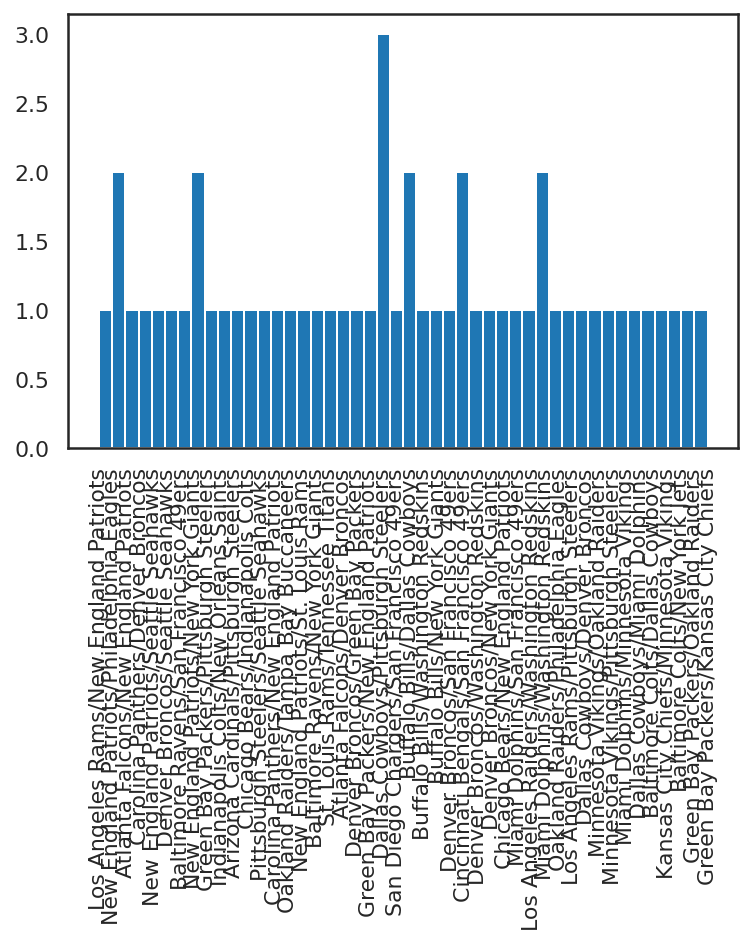

In [139]:
# unique pairs of teams
pairs = ['/'.join(sorted(x)) for x in pd.concat((df_sb["Winner"],df_sb["Loser"]), axis=1).values]
unique_pairs = np.unique(pairs)
plt.hist(pairs, len(unique_pairs))
plt.xticks(rotation=90)
plt.show()

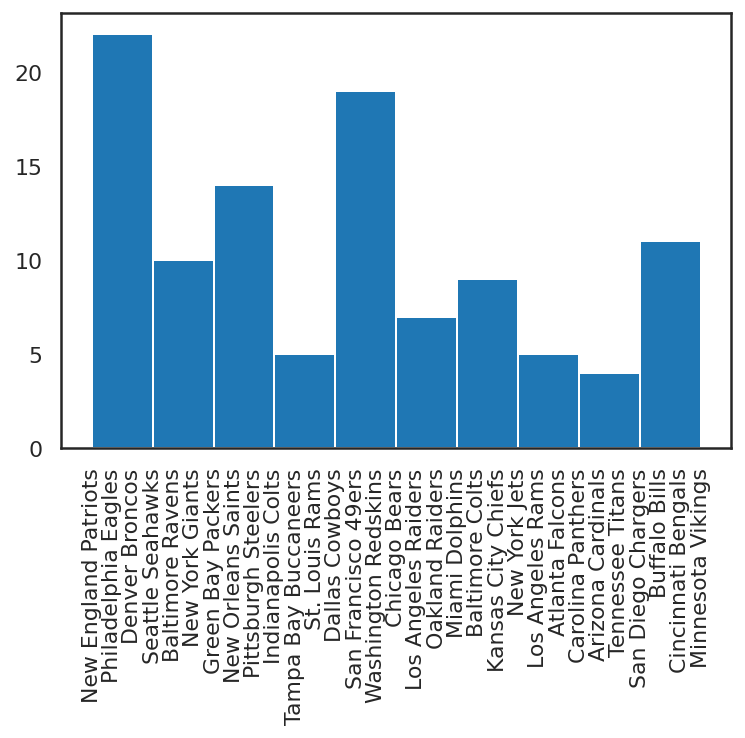

In [107]:
plt.hist(pd.concat((df_sb["Winner"],df_sb["Loser"]), axis=0))#, alpha=0.5, label="winner")
# plt.hist(df_sb["Loser"], alpha=0.5, label="loser")
plt.xticks(rotation=90)
plt.show()

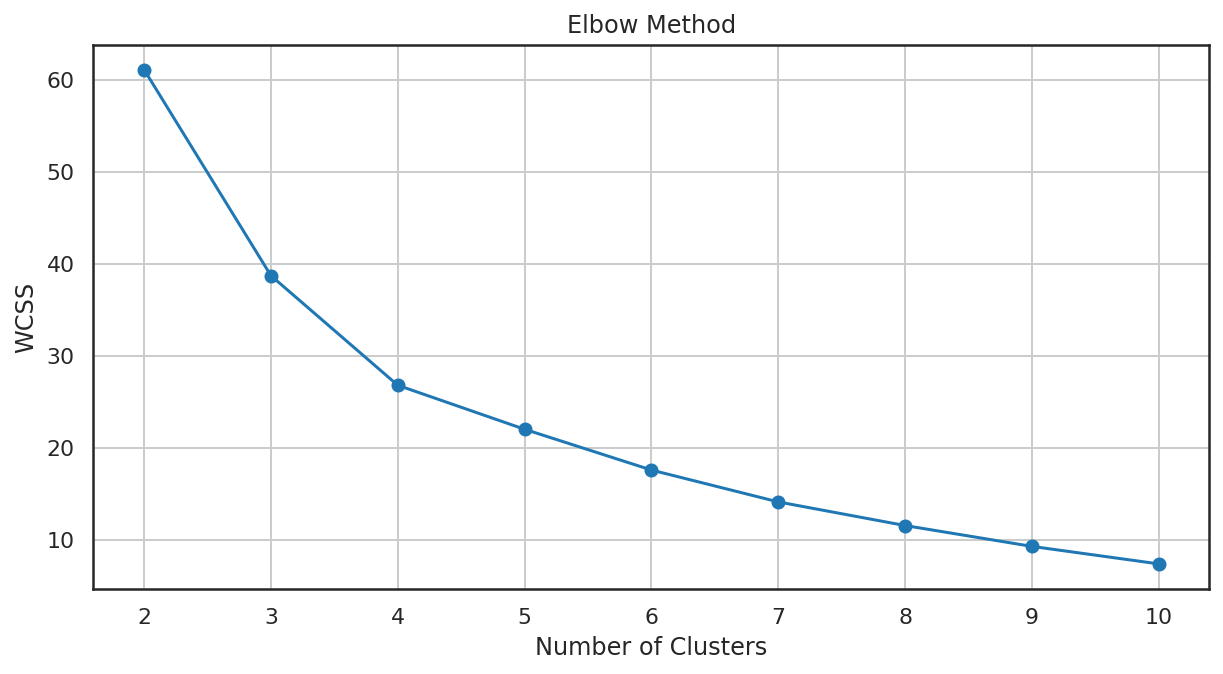

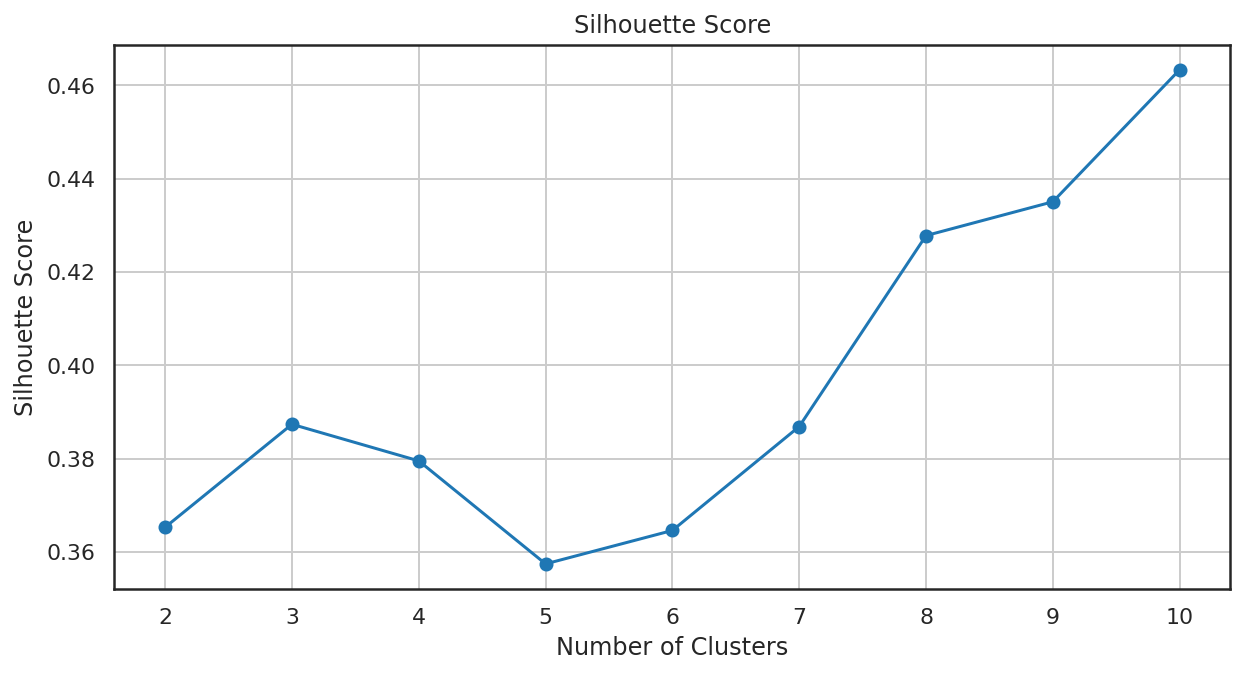

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming df_sb contains the data you want to cluster

# Drop any rows with missing values
df_sb.dropna(inplace=True)

# Exclude non-numeric columns
X = df_sb.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Range of cluster numbers to try
range_n_clusters = range(2, 11)  # Adjust as needed

# List to store within-cluster sum of squares
wcss = []

# List to store silhouette scores
silhouette_scores = []

# Iterate over the range of cluster numbers
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df_sb contains the data you want to cluster

# Drop any rows with missing values
df_sb.dropna(inplace=True)

# Exclude non-numeric columns
X = df_sb.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # You can adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_sb['Cluster'] = cluster_labels

# Print the DataFrame with cluster labels
print(df_sb)

    Year   SB                Winner  Winner Pts                 Loser  \
1   2019   53  New England Patriots          13      Los Angeles Rams   
2   2018   52   Philadelphia Eagles          41  New England Patriots   
3   2017   51  New England Patriots          34       Atlanta Falcons   
4   2016   50        Denver Broncos          24     Carolina Panthers   
5   2015   49  New England Patriots          28      Seattle Seahawks   
6   2014   48      Seattle Seahawks          43        Denver Broncos   
7   2013   47      Baltimore Ravens          34   San Francisco 49ers   
8   2012   46       New York Giants          21  New England Patriots   
9   2011   45     Green Bay Packers          31   Pittsburgh Steelers   
10  2010   44    New Orleans Saints          31    Indianapolis Colts   
11  2009   43   Pittsburgh Steelers          27     Arizona Cardinals   
12  2008   42       New York Giants          17  New England Patriots   
13  2007   41    Indianapolis Colts          29    

In [71]:
df_sb.head()

,Year,SB,Winner,Winner Pts,Loser,Loser Pts
1,2019,53,New England Patriots,13,Los Angeles Rams,3
2,2018,52,Philadelphia Eagles,41,New England Patriots,33
3,2017,51,New England Patriots,34,Atlanta Falcons,28
4,2016,50,Denver Broncos,24,Carolina Panthers,10
5,2015,49,New England Patriots,28,Seattle Seahawks,24


In [80]:
enc.fit([df_sb["Winner"]])

OneHotEncoder(handle_unknown='ignore')

In [93]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

# [n, 1] instead of[1, n] 
enc.fit(df_sb["Winner"].values.reshape(-1, 1))

labels = enc.transform(df_sb["Winner"].values.reshape(-1, 1))
df_sb["Winner Pts"]

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df_sb.values)